# Movies on Netflix, Hulu, Prime Video and Disney+ Data Visualization

## Finding the Reason for high rating in a cirten region

## ** The dataset that has been used here is taken from kaggle **

In [23]:
import pandas as pd
import numpy as np

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder


## The Top 10

In [2]:
#Creating a dataframe usin the csv
movie = pd.read_csv('movies.csv')

# Remove "Unnamed" 
movie=movie.drop("Unnamed: 0",axis=1)

movie.head(n=10)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [3]:
#Description overview of the data
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


In [4]:
#Check for total no.of null values in each column 
movie.isna().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

# Top 5 Genres

In [5]:
movie['Genres'].value_counts().head()


Drama           1341
Documentary     1229
Comedy          1040
Comedy,Drama     446
Horror           436
Name: Genres, dtype: int64

 ### So from here we can note that, in the overall basis we have Drama genre the most. 

In [6]:
movie[movie['Netflix'] == 1]['Genres'].value_counts().head()

Comedy                  424
Drama                   259
Documentary             241
Comedy,Drama            129
Comedy,Drama,Romance    100
Name: Genres, dtype: int64

### Here we can say that we have the Comedy genre the most in Netflix

In [7]:
movie[movie['Hulu'] == 1]['Genres'].value_counts().head()

Documentary             75
Drama                   44
Comedy,Drama            38
Comedy                  36
Comedy,Drama,Romance    30
Name: Genres, dtype: int64

### Here we see that we have Documentary Genre as the most rated in HULU

In [8]:
movie[movie['Prime Video'] == 1]['Genres'].value_counts().head()

Drama           1069
Documentary      900
Comedy           622
Horror           400
Comedy,Drama     302
Name: Genres, dtype: int64

### Here we see that Drama is most rated on Prime Video

In [9]:
movie[movie['Disney+']==1]['Genres'].value_counts().head()

Documentary                                  34
Animation,Adventure,Comedy,Family,Fantasy    16
Action,Adventure,Sci-Fi                      13
Comedy,Drama,Family                          13
Comedy,Family                                13
Name: Genres, dtype: int64

### Here we have the Documentary genre the most in Disney+

In [10]:
movie['Country'].value_counts().head()

United States     8776
India             1064
United Kingdom     905
Canada             555
Australia          202
Name: Country, dtype: int64

### Here we see that the most consumed OTT Media is United States and India

<AxesSubplot:>

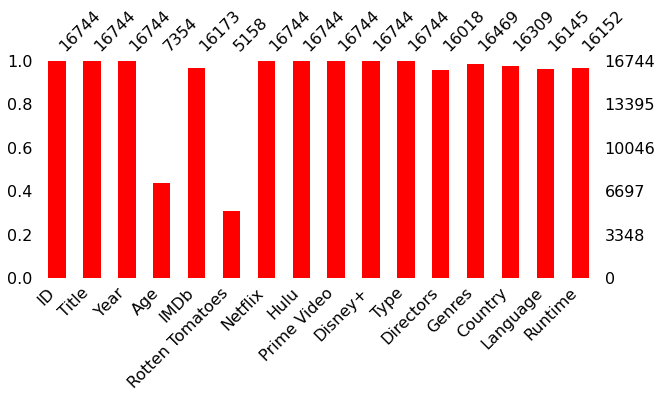

In [12]:
#Visualizing the amount of missing data
msno.bar(movie ,color='red', figsize=(10, 4))

## We see that there is some age data and data reguarding Rotten Tomatoes rating is missing

### ** So we have to decide if we want to drop the missing data or not
        lets drop Rotten Tomatoes Rating Since its extensively low
        and 
        as for age data might be irrelevant (because in age groups lower than 18 a chunk of content is "Unavailable" ) and hence biases can be formed

In [13]:
#Dropping "Rotten Tomatoes" for its excessively low data 
movie = movie.drop(['Rotten Tomatoes'], axis=1)

In [14]:
#"Title" and "Type" are dropped as it is irrelevant for our prediction.
movie = movie.drop(['Title','Type'], axis=1)
movie.isna().sum()

ID                0
Year              0
Age            9390
IMDb            571
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Directors       726
Genres          275
Country         435
Language        599
Runtime         592
dtype: int64

In [15]:
#Checking unique values in "Age" 
movie['Age'].unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [22]:
#Imputing null values in "Age" with "all"
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="all")
movie["Age"] = imputer.fit_transform(movie[["Age"]]).ravel()

movie.isna().sum()

ID               0
Year             0
Age              0
IMDb           571
Netflix          0
Hulu             0
Prime Video      0
Disney+          0
Directors      726
Genres         275
Country        435
Language       599
Runtime        592
dtype: int64

In [24]:
#Dropping all the rows(entries) where there are celss with no data 
movie.dropna(axis=0, how='any',inplace=True)

movie.isna().sum()

ID             0
Year           0
Age            0
IMDb           0
Netflix        0
Hulu           0
Prime Video    0
Disney+        0
Directors      0
Genres         0
Country        0
Language       0
Runtime        0
dtype: int64

<AxesSubplot:>

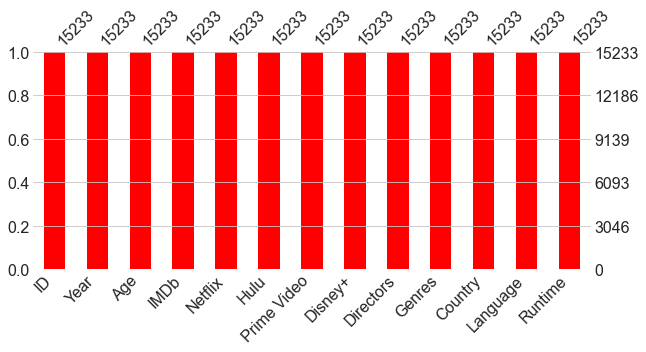

In [26]:
#Visualizing if there is anymore missing data or not
msno.bar(movie ,color='red', figsize=(10, 4))

In [27]:
# Description of the Data
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15233 entries, 0 to 16740
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           15233 non-null  int64  
 1   Year         15233 non-null  int64  
 2   Age          15233 non-null  object 
 3   IMDb         15233 non-null  float64
 4   Netflix      15233 non-null  int64  
 5   Hulu         15233 non-null  int64  
 6   Prime Video  15233 non-null  int64  
 7   Disney+      15233 non-null  int64  
 8   Directors    15233 non-null  object 
 9   Genres       15233 non-null  object 
 10  Country      15233 non-null  object 
 11  Language     15233 non-null  object 
 12  Runtime      15233 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.6+ MB


In [28]:
# Choose target and features
y = movie.IMDb

X = movie.drop(['IMDb'], axis=1)

#Split the data for train and test
X_train_full, X_test_full, y_train, y_test  = train_test_split(X, y,random_state = 0)

#List of Categorical colunmns to be used as features
cat_cols=["Age","Directors","Genres","Country","Language"]

#List of Numerical colunmns to be used as features
numerical_cols = ['Year','Runtime']

#Keep selected columns only
my_cols = numerical_cols + cat_cols 
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [29]:
#Viewing Test data (Top 05)
X_train.head()

,Year,Runtime,Age,Directors,Genres,Country,Language
13575,1972,88.0,18+,Vernon Zimmerman,"Action,Comedy,Drama,Sport",United States,English
9828,2011,93.0,13+,Nayan Padrai,"Comedy,Romance",United States,English
1255,2020,104.0,all,William Wyler,"Drama,Romance",United States,"English,French"
9799,2017,149.0,all,Boyapati Srinu,"Action,Romance",India,Telugu
11211,1941,66.0,all,Howard Bretherton,"Action,Adventure,Western",United States,English
